## I. Import Libraries

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing
# Model  Building
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
# Model Validation
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

## II. Data Preprocessing

In [2]:
df = pd.read_csv("E:\ExcelR Assignment\Assignment 15 - Random Forests\Company_Data.csv")

In [3]:
df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### Here we need to classify Sales to be High or Low, our Target Variable is Sales and we need to get insights for which feature participates best for Target Variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


#### No Null values

In [5]:
df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [6]:
df.shape

(400, 11)

## 1. Data Analysis & Data Visualization

### 1.1 Univariate Analysis for Continuous Variables

<AxesSubplot:xlabel='Price', ylabel='Count'>

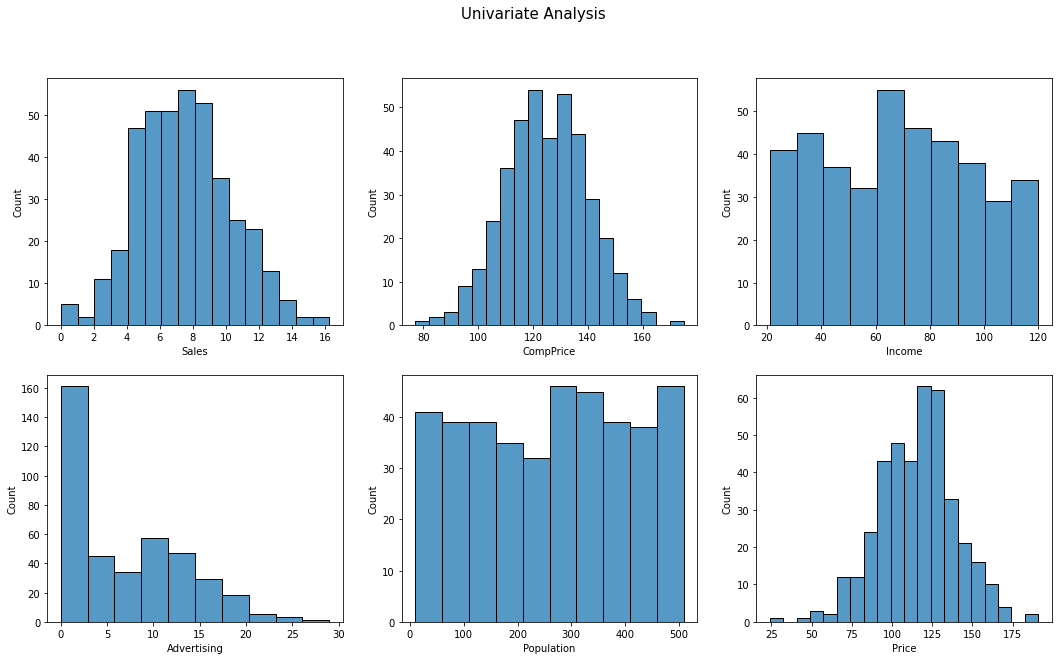

In [7]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.histplot(df.Sales,ax=axes[0, 0])
sns.histplot(df.CompPrice,ax=axes[0, 1])
sns.histplot(df.Income,ax=axes[0, 2])
sns.histplot(df.Advertising,ax=axes[1, 0])
sns.histplot(df.Population,ax=axes[1, 1])
sns.histplot(df.Price,ax=axes[1, 2])

#### Other then Advertising Column all variables seem to be normally distributed

### 1.2 Univariate Analysis for Categorical Variables

<AxesSubplot:xlabel='US', ylabel='count'>

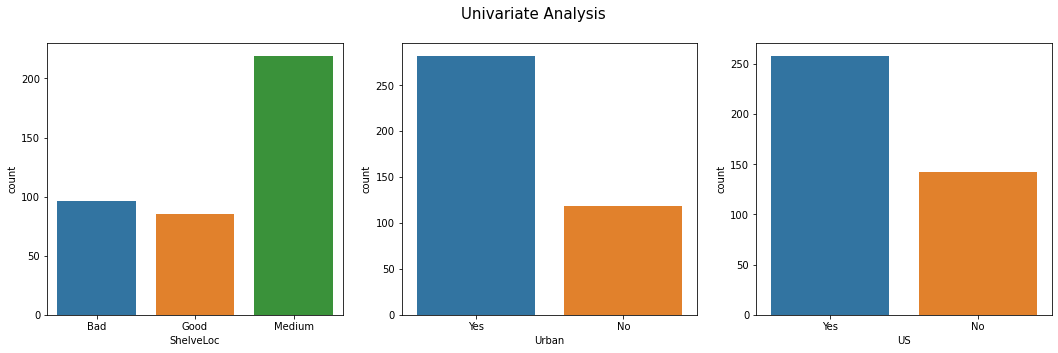

In [8]:
fig, axes = plt.subplots(1,3, figsize=(18, 5))
fig.suptitle('Univariate Analysis',fontsize=15)
sns.countplot(data=df,x='ShelveLoc',ax=axes[0])
sns.countplot(data=df,x='Urban',ax=axes[1])
sns.countplot(data=df,x='US',ax=axes[2])

##### Inferences:
We can infer that proportion of Medium Shelf Location, Urban, and US count is maximum

### 1.3 Bivariate Analysis

<AxesSubplot:xlabel='Sales', ylabel='Age'>

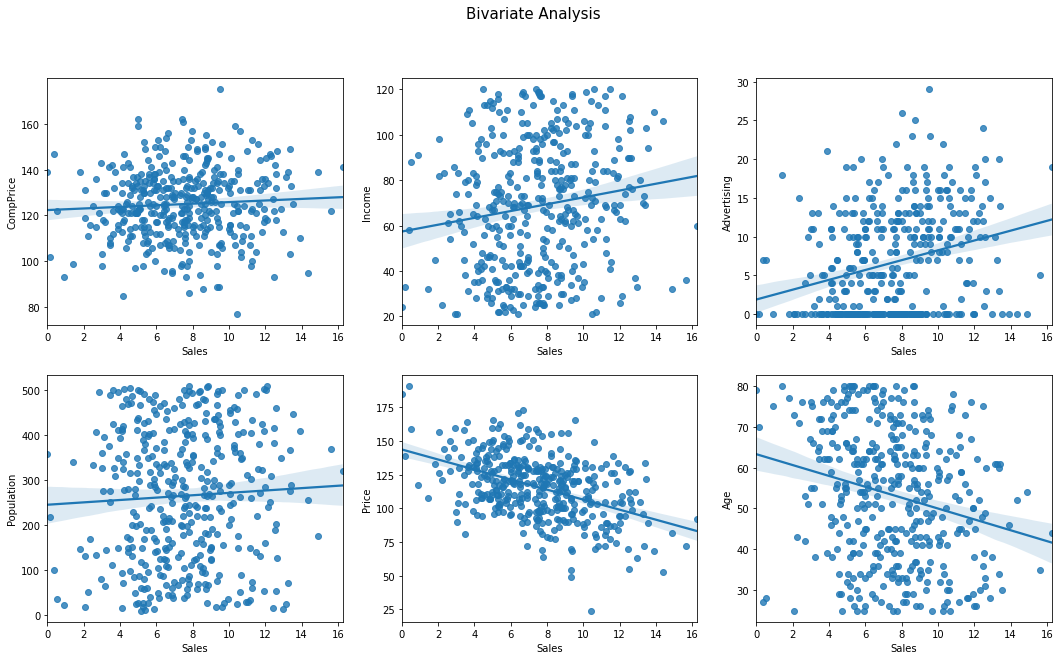

In [9]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Bivariate Analysis',fontsize=15)
sns.regplot(data=df,x='Sales',y='CompPrice',ax=axes[0, 0])
sns.regplot(data=df,ax=axes[0, 1],x='Sales',y='Income')
sns.regplot(data=df,ax=axes[0, 2],x='Sales',y='Advertising')
sns.regplot(data=df,ax=axes[1, 0],x='Sales',y='Population')
sns.regplot(data=df,ax=axes[1, 1],x='Sales',y='Price')
sns.regplot(data=df,ax=axes[1, 2],x='Sales',y='Age')

### Positive Relationships:
- Income vs Sales
- Advertising vs Sales

### Negative Relationships:
- Price vs Sales
- Age vs Sales

<AxesSubplot:>

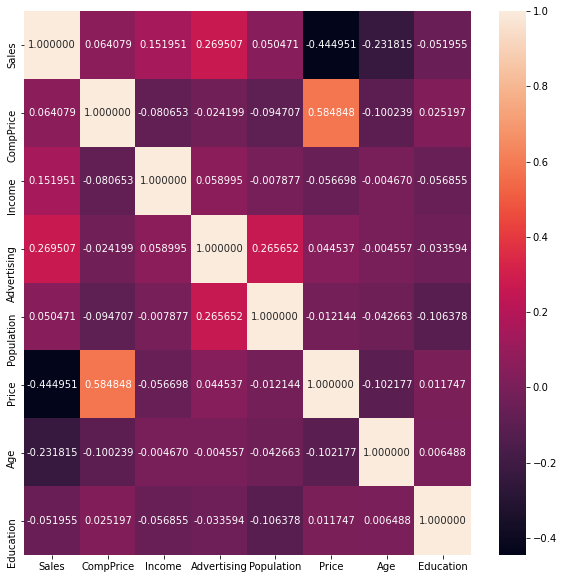

In [10]:
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(df.corr(),annot=True,fmt="f")

#### Inferences
1. Price and CompPrice has good positive correlation
2. Price and Sales has a moderate negative Correlation

## 2. Data Pre-Processing

In [11]:
df1 = df.copy()

### 2.1 One Hot Encoding Features

In [12]:
df1 = pd.get_dummies(df)
df1.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1


### 2.2 Binning

In [13]:
df1.loc[df1.Sales<=7.5,'sales'] ='Low'
df1.loc[df1.Sales>7.5,'sales'] ='High'

### 2.3 Label Encoding Target Variable

In [14]:
label_encoder = preprocessing.LabelEncoder()
df1['Labelsales']= label_encoder.fit_transform(df1['sales'])
df1.head(2)

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,sales,Labelsales
0,9.50,138,73,11,276,120,42,17,1,0,0,0,1,0,1,High,0
1,11.22,111,48,16,260,83,65,10,0,1,0,0,1,0,1,High,0


## III. Building Models

In [15]:
X = df1.iloc[:,1:-2]
y = df1.iloc[:,-1]

In [174]:
# Splitting data into training and testing data set
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.2,random_state=42,stratify=y)

In [17]:
y_train.value_counts(normalize=True),y_test.value_counts(normalize=True)

(1    0.503571
 0    0.496429
 Name: Labelsales, dtype: float64,
 1    0.508333
 0    0.491667
 Name: Labelsales, dtype: float64)

### 3.1.1 Logistic Regression

In [18]:
model1 = LogisticRegression(max_iter=1000,solver='liblinear',random_state=10)

In [19]:
model1.fit(X_train,y_train)
result1 = model1.score(X_train,y_train)
result2 = model1.score(X_test,y_test)
result1, result2

(0.9285714285714286, 0.8416666666666667)

#### So for Logistic Regression, we can infer that 92.85% is Train Acccuracy and 84.16% is Test Accuracy

### 3.1.2 Decision Tree

#### 3.1.2.1 Using C 5.0 Decision Tree Classifier

In [20]:
model2 = DecisionTreeClassifier(max_depth=5,random_state=10,criterion='entropy')

In [21]:
model2.fit(X_train,y_train)
result3 = model2.score(X_train,y_train)
result4 = model2.score(X_test,y_test)
result3, result4

(0.8785714285714286, 0.725)

#### Here Train Accuracy and Test Accuracy vary so we need to Tune Parameters

#### Tuning Tree Parameters

In [22]:
train_Accuracy = []
test_Accuracy = []

for depth in range(1,10):
    dtmodel = DecisionTreeClassifier(max_depth = depth,random_state=10,criterion='entropy')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [23]:
frame = pd.DataFrame({'max_depth':range(1,10),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_depth,Train_Acc,Test_Acc
0,1,0.653571,0.650000
1,2,0.725000,0.600000
2,3,0.789286,0.716667
3,4,0.828571,0.716667
4,5,0.878571,0.725000
5,6,0.917857,0.741667
6,7,0.950000,0.750000
7,8,0.964286,0.716667
8,9,0.975000,0.725000


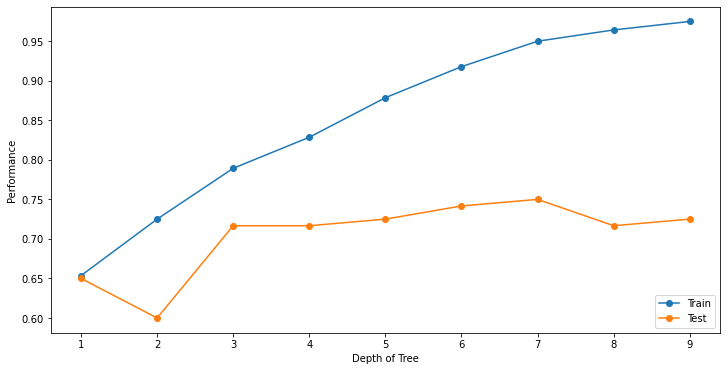

In [24]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_depth'],frame['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So choosing max_depth = 7 as it gives good Test Accuracy

In [25]:
train_Accuracy = []
test_Accuracy = []

for nodes in range(2,15):
    dtmodel = DecisionTreeClassifier(max_depth = 7,max_leaf_nodes=nodes,random_state=10,criterion='entropy')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [26]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,15),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_leaf_nodes,Train_Acc,Test_Acc
0,2,0.653571,0.650000
1,3,0.714286,0.600000
2,4,0.775000,0.708333
3,5,0.785714,0.708333
4,6,0.785714,0.708333
5,7,0.814286,0.725000
6,8,0.842857,0.725000
7,9,0.850000,0.741667
8,10,0.850000,0.741667
9,11,0.850000,0.741667


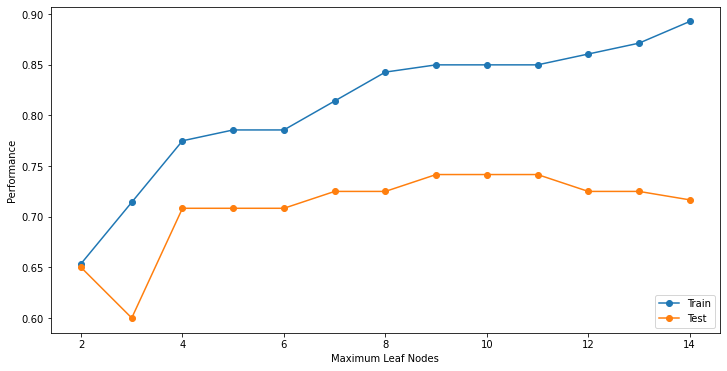

In [27]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf_nodes'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_leaf_nodes'],frame['Test_Acc'],marker='o')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So choosing max_leaf_nodes = 9 as it gives good Test Accuracy

In [28]:
dtmodel = DecisionTreeClassifier(max_depth = 5 , max_leaf_nodes = 9, random_state=10,criterion='entropy')
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=9,
                       random_state=10)

In [29]:
result5 = dtmodel.score(X_train,y_train)
result6 = dtmodel.score(X_test,y_test)
result5, result6

(0.8428571428571429, 0.725)

#### So tuning Parameters we get 84.28% Accuracy for Train Data and 72.5% for Test Data

#### 3.1.2.2 Using CART Decision Tree Classifier (Gini Impurity)

In [75]:
dtmodel1 = DecisionTreeClassifier(random_state=10,max_depth=5,criterion='gini')
dtmodel1.fit(X_train,y_train)
result15=dtmodel1.score(X_train,y_train)
result16=dtmodel1.score(X_test,y_test)

In [76]:
result15,result16

(0.9107142857142857, 0.7)

#### Here Train Accuracy and Test Accuracy vary so we need to Tune Parameters

#### Tuning Tree Parameters

In [32]:
train_Accuracy = []
test_Accuracy = []

for depth in range(1,10):
    dtmodel = DecisionTreeClassifier(max_depth = depth,random_state=10,criterion='gini')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [33]:
frame = pd.DataFrame({'max_depth':range(1,10),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_depth,Train_Acc,Test_Acc
0,1,0.678571,0.566667
1,2,0.771429,0.633333
2,3,0.807143,0.625000
3,4,0.835714,0.683333
4,5,0.910714,0.700000
5,6,0.946429,0.683333
6,7,0.964286,0.683333
7,8,0.982143,0.700000
8,9,0.996429,0.700000


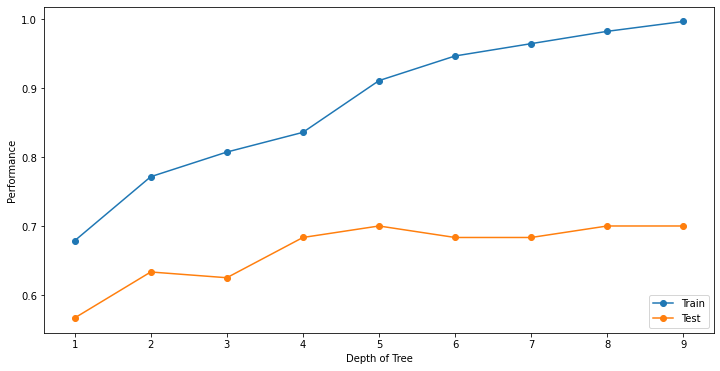

In [34]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_depth'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_depth'],frame['Test_Acc'],marker='o')
plt.xlabel('Depth of Tree')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So choosing max_depth = 5 as it gives good Test Accuracy

In [35]:
train_Accuracy = []
test_Accuracy = []

for nodes in range(2,15):
    dtmodel = DecisionTreeClassifier(max_depth = 5,max_leaf_nodes=nodes,random_state=10,criterion='gini')
    dtmodel.fit(X_train,y_train)
    train_Accuracy.append(dtmodel.score(X_train,y_train))
    test_Accuracy.append(dtmodel.score(X_test,y_test))

In [36]:
frame = pd.DataFrame({'max_leaf_nodes':range(2,15),'Train_Acc':train_Accuracy,'Test_Acc':test_Accuracy})
frame

,max_leaf_nodes,Train_Acc,Test_Acc
0,2,0.678571,0.566667
1,3,0.746429,0.591667
2,4,0.771429,0.633333
3,5,0.771429,0.633333
4,6,0.792857,0.625000
5,7,0.796429,0.683333
6,8,0.810714,0.683333
7,9,0.846429,0.708333
8,10,0.857143,0.708333
9,11,0.857143,0.708333


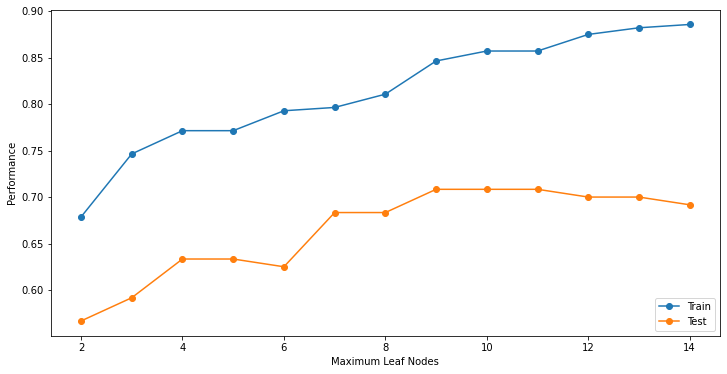

In [37]:
plt.figure(figsize=(12,6))
plt.plot(frame['max_leaf_nodes'],frame['Train_Acc'],marker='o')
plt.plot(frame['max_leaf_nodes'],frame['Test_Acc'],marker='o')
plt.xlabel('Maximum Leaf Nodes')
plt.ylabel('Performance')
plt.legend(['Train','Test'],loc="lower right")

#### So choosing max_leaf_nodes = 9 as it gives good Test Accuracy

In [38]:
dtmodel = DecisionTreeClassifier(max_depth = 5 , max_leaf_nodes = 9, random_state=10,criterion='gini')
dtmodel.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=9, random_state=10)

In [39]:
result7 = dtmodel.score(X_train,y_train)
result8 = dtmodel.score(X_test,y_test)
result7, result8

(0.8464285714285714, 0.7083333333333334)

#### So tuning Parameters we get 84.64% Accuracy for Train Data and 70.83% for Test Data

#### Getting Best Decision Tree with GridSearchCV

In [90]:
dtmodel = DecisionTreeClassifier(random_state=10)
a=[3,4,5,6,7,8,9,10]
parameter = [{'max_depth':a,'max_leaf_nodes':a,'criterion':['entropy','gini'],'min_samples_split':a,'min_samples_leaf':a}]

In [91]:
gridparam = GridSearchCV(dtmodel,parameter)
gridparam.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=10),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                          'max_leaf_nodes': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10],
                          'min_samples_split': [3, 4, 5, 6, 7, 8, 9, 10]}])

In [92]:
gridparam.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_leaf_nodes': 9,
 'min_samples_leaf': 5,
 'min_samples_split': 3}

In [93]:
fdtmodel = DecisionTreeClassifier(random_state=10,max_depth=5,max_leaf_nodes=9,min_samples_leaf=5,min_samples_split=3,criterion='gini')
fdtmodel.fit(X_train,y_train)
result25 = fdtmodel.score(X_train,y_train)
result26 = fdtmodel.score(X_test,y_test)

In [94]:
print(result25,result26)

0.8464285714285714 0.7083333333333334


### 3.1.3 Bagging Classifier Method

In [42]:
cart = DecisionTreeClassifier()
num_trees = 100
Bmodel = BaggingClassifier(base_estimator=cart, n_estimators=num_trees)

In [51]:
result9 = cross_val_score(Bmodel,X_train,y_train)
result10 = cross_val_score(Bmodel,X_test,y_test)
print(result9,result10)

[0.78571429 0.82142857 0.85714286 0.85714286 0.78571429] [0.66666667 0.625      0.70833333 0.58333333 0.75      ]


In [47]:
print(result9.mean(),result10.mean())

0.825 0.6583333333333334


In [77]:
result17=result9.mean()
result18=result10.mean()

#### So we get 82.5% Accuracy for Train Data and 65.83% for Test Data

### Building Bagging model with GridSearch CV

In [128]:
num1_trees = [100,200,300,400,500,600,700,800,900,1000]
cart1 = DecisionTreeClassifier(random_state=10,max_depth=5,max_leaf_nodes=9,min_samples_leaf=5,min_samples_split=3,criterion='gini')
a = LogisticRegression(max_iter=1000,solver='liblinear')
parameter = [{'base_estimator':[cart1,a],'n_estimators':num1_trees}]
gB_model = BaggingClassifier()

In [129]:
gridBagging = GridSearchCV(gB_model,parameter)
gridBagging.fit(X_train,y_train)
gridBagging.best_params_

{'base_estimator': LogisticRegression(max_iter=1000, solver='liblinear'),
 'n_estimators': 200}

In [132]:
gBmodel = BaggingClassifier(base_estimator=a,n_estimators=400)
gBmodel.fit(X_train,y_train)
result27 = gBmodel.score(X_train,y_train)
result28 = gBmodel.score(X_test,y_test)

In [133]:
print(result27,result28)

0.9321428571428572 0.825


### 3.1.4 Random Forest Method

In [175]:
Rmodel = RandomForestClassifier()
Rmodel.fit(X_train,y_train)

RandomForestClassifier()

In [176]:
result11 = Rmodel.score(X_train,y_train)
result12 = Rmodel.score(X_test,y_test)
pred=np.mean(y_test==Rmodel.predict(X_test))
print(result11,result12,pred)

1.0 0.775 0.775


In [177]:
print(result11.mean(),result12.mean())

1.0 0.775


In [178]:
result19=result11.mean()
result20=result12.mean()

#### So we get 79.99% Accuracy for Train Data and 69.16% for Test Data

### 3.1.5 AdaBoost Classifier Method

In [59]:
num_trees = 500
Amodel = AdaBoostClassifier(n_estimators=num_trees)

In [60]:
result13 = cross_val_score(Amodel,X_train,y_train)
result14 = cross_val_score(Amodel,X_test,y_test)
print(result13,result14)

[0.78571429 0.91071429 0.89285714 0.85714286 0.78571429] [0.875      0.625      0.75       0.70833333 0.875     ]


In [61]:
print(result13.mean(),result14.mean())

0.8464285714285715 0.7666666666666667


In [79]:
result21=result13.mean()
result22=result14.mean()

#### So we get 84.64% Accuracy for Train Data and 76.67% for Test Data

### 3.1.6 Stack Ensemble Classifier Method

##### Create Submodels

In [66]:
estimators = []
model_1 = LogisticRegression(max_iter = 2000)
estimators.append(('Logistic Regression', model_1))
model_2 = DecisionTreeClassifier(max_depth = 5 , max_leaf_nodes = 9, random_state=10,criterion='entropy')
estimators.append(('C 5.0', model_2))
model_3 = DecisionTreeClassifier(max_depth = 5 , max_leaf_nodes = 9, random_state=10,criterion='gini')
estimators.append(('CART', model_3))
model_4 = SVC()
estimators.append(('SVM', model_4))
model_5 = BaggingClassifier(base_estimator=model_2, n_estimators=100)
estimators.append(('Bagging Classifier', model_5))
model_6 = RandomForestClassifier(n_estimators=500,max_features=3)
estimators.append(('Random Forest Classifier', model_6))
model_7 = AdaBoostClassifier(n_estimators=500)
estimators.append(('AdaBoost Classifier', model_7))

#### Create Ensemble Model

In [71]:
ensemble = VotingClassifier(estimators)
results_train = cross_val_score(ensemble, X_train,y_train)
results_test = cross_val_score(ensemble, X_test,y_test)
print(results_train,results_test)

[0.82142857 0.80357143 0.89285714 0.82142857 0.78571429] [0.875      0.66666667 0.66666667 0.70833333 0.70833333]


In [72]:
print(results_train.mean(),results_test.mean())

0.825 0.725


In [80]:
result23=results_train.mean()
result24=results_test.mean()

## Overall Summary

In [143]:
Results = pd.DataFrame({'Models':['Logistic Regression Classifier','C 5.0 Classifier wihout tuning','C 5.0 Classifier with tuning','CART Classifier without tuning','CART Classifier with tuning','Best Decision Tree Model','Bagging Classifier','Best Bagging','Random Forest Classifier','AdaBoost Classifier','Stacking'],'Train Results':[result1,result3,result5,result15,result7,result25,result17,result27,result19,result21,result23],'Test Results':[result2,result4,result6,result16,result8,result26,result18,result28,result20,result22,result24]})

In [144]:
Results

,Models,Train Results,Test Results
0,Logistic Regression Classifier,0.928571,0.841667
1,C 5.0 Classifier wihout tuning,0.878571,0.725000
2,C 5.0 Classifier with tuning,0.842857,0.725000
3,CART Classifier without tuning,0.910714,0.700000
4,CART Classifier with tuning,0.846429,0.708333
5,Best Decision Tree Model,0.846429,0.708333
6,Bagging Classifier,0.821429,0.666667
7,Best Bagging,0.932143,0.825000
8,Random Forest Classifier,0.800000,0.691667
9,AdaBoost Classifier,0.846429,0.766667


In [145]:
a = Results['Train Results']-Results['Test Results']
a

0     0.086905
1     0.153571
2     0.117857
3     0.210714
4     0.138095
5     0.138095
6     0.154762
7     0.107143
8     0.108333
9     0.079762
10    0.100000
dtype: float64

In [146]:
a.min()

0.07976190476190481

#### So AdaBoost worked Best as the Train and Test Accuracy are nearer